# Feature Selection

Feature selection… is the process of selecting a subset of relevant features for use in model construction


In [1]:
import sys
sys.path.append('/Users/griggles/Documents/FLATIRON/PROJECT_2')
from masseuse import Masseuse
m = Masseuse(csv_dir='/Users/griggles/Documents/FLATIRON/PROJECT_2/csv/')
m.build_data()

fertility  mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                                          
ALB          1984       3.323               58.2                 5.390937   
             1985       3.269               54.0                 5.399862   
             1986       3.217               50.4                 5.413536   
             1987       3.164               47.2                 5.417392   
             1988       3.108               44.5                 5.423440   
             1989       3.046               42.2                 5.448271   
             1990       2.978               40.1                 5.502622   
             1991       2.905               38.4                 5.657271   
             1992       2.829               36.8                 5.837060   
             1993       2.751               35.4                 6.036463   
             1994       2.672               33.9                 6.242320   
             1995       2.591               32.4                 6.445318   
             1996       2.507               30.9                 6.577426   
             1997       2.422               29.3                 6.696969   
             1998       2.334               27.7                 6.812513   
             1999       2.246               26.1                 6.936631   
             2000       2.157               24.5                 7.074572   
             2001       2.068               22.9                 7.331905   
             2002       1.981               21.4                 7.610477   
             2003       1.897               19.9                 7.906320   
             2004       1.821               18.5                 8.211323   
             2005       1.754               17.2                 8.521785   
             2006       1.703               16.0                 8.927716   
             2007       1.668               14.8                 9.345029   
             2008       1.650               13.8                 9.775305   
             2009       1.646               12.8                10.218235   
             2010       1.653               12.0                10.672584   
             2011       1.668               11.3                11.053833   
             2012       1.685               10.7                11.418615   
             2013       1.700               10.1                11.771791   
...                       ...                ...                      ...   
ZWE          1987       5.784               75.8                 3.009991   
             1988       5.569               75.0                 2.997063   
             1989       5.365               75.6                 2.988809   
             1990       5.176               77.5                 2.988850   
             1991       5.001               80.7                 3.012877   
             1992       4.840               84.8                 3.036282   
             1993       4.691               89.3                 3.057862   
             1994       4.555               93.8                 3.075439   
             1995       4.433               98.0                 3.087856   
             1996       4.327              101.0                 3.109723   
             1997       4.236              102.7                 3.124023   
             1998       4.161              103.2                 3.131157   
             1999       4.101              102.6                 3.131053   
             2000       4.055              101.8                 3.123803   
             2001       4.022              100.8                 3.138192   
             2002       4.001              100.1                 3.142156   
             2003       3.989               99.4                 3.137638   
             2004       3.984               99.4                 3.126837   
             2005       3.985               99.6                 3.109938   
             200

## Top reasons to use feature selection are:
* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It reduces overfitting.

## Types of Feature Selection

* Filter Methods
* Wrapper Methods
* Embedded Methods

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

columns = "age sex bmi map tc ldl hdl tch ltg glu y".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.read_csv('diabetes.tab.txt', sep='\t', lineterminator='\n')
df.columns= columns
features = df.iloc[:,:-1]
target = df.y

In [3]:
features['female'] = pd.get_dummies(features['sex'],drop_first=True)
features.drop(columns=['sex'], inplace=True)

In [4]:
features.head()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,female
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,1
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,0
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,1
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,0
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)


If you have multiple predictor variables in a regression, here is advice from Tabachnick & Fidell, Using Multivariate Statistics (k is the number of predictors)

a minimum N > 50 + (8*k) for tests of multiple R

a minimum N > 104 + k for tests of individual predictors

In [6]:
from sklearn import preprocessing
from sklearn import pipeline

scaler = preprocessing.StandardScaler()

In [7]:
scaler.fit(features.iloc[:,:-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaler.fit(X_train.iloc[:,:-1])
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:-1]), columns=X_train.columns[:-1], index=X_train.index)

features_scaled_train['female']= X_train.female

features_scaled_train.head()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,female
268,1.367551,1.826023,1.462079,0.370605,0.728718,-1.102722,1.502515,0.619668,1.542137,1
170,0.529451,-0.424891,-0.767296,-0.331690,-0.354292,1.230277,-0.826539,-1.986232,-0.388269,1
384,0.758024,-0.625468,0.095688,1.859471,1.747264,0.685910,-0.050188,0.511034,-0.826997,1
118,-1.146749,-0.224315,0.527180,0.426789,0.780290,-0.869422,0.726164,0.439618,1.191154,1
27,-0.461031,1.224293,-0.839211,-0.921618,-0.940923,0.219311,-0.826539,-0.319121,0.840171,0


In [9]:
X_test.head()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,female
149,35,25.9,81.0,174,102.4,31.0,6.0,5.3132,82,1
314,42,30.1,91.0,182,114.8,49.0,4.0,4.5109,82,0
214,57,23.3,88.0,155,63.6,78.0,2.0,4.2047,78,0
95,29,21.0,71.0,156,97.0,38.0,4.0,4.6540,90,0
19,41,24.7,83.0,187,108.2,60.0,3.0,4.5433,78,0


In [10]:
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:-1]), columns=X_test.columns[:-1], index=X_test.index)

features_scaled_test['female']= X_test.female

features_scaled_test.head()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,female
149,-0.994367,-0.112883,-0.983042,-0.472149,-0.463883,-1.491555,1.502515,1.281676,-0.826997,1
314,-0.461031,0.823140,-0.263889,-0.247415,-0.064200,-0.091756,-0.050188,-0.234103,-0.826997,0
214,0.681833,-0.692327,-0.479634,-1.005894,-1.714502,2.163476,-1.602891,-0.812604,-1.177980,0
95,-1.451512,-1.204911,-1.702195,-0.977802,-0.637938,-0.947188,-0.050188,0.036255,-0.125031,0
19,-0.537221,-0.380319,-0.839211,-0.106956,-0.276934,0.763677,-0.826539,-0.172890,-1.177980,0


In [11]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_64_train = pd.DataFrame(poly.fit_transform(features_scaled_train), columns=poly.get_feature_names(features_scaled_train.columns))
features_64_train.head()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,female,...,tch^2,tch ltg,tch glu,tch female,ltg^2,ltg glu,ltg female,glu^2,glu female,female^2
0,1.367551,1.826023,1.462079,0.370605,0.728718,-1.102722,1.502515,0.619668,1.542137,1.0,...,2.257552,0.931061,2.317084,1.502515,0.383988,0.955613,0.619668,2.378187,1.542137,1.0
1,0.529451,-0.424891,-0.767296,-0.331690,-0.354292,1.230277,-0.826539,-1.986232,-0.388269,1.0,...,0.683168,1.641700,0.320919,-0.826539,3.945119,0.771192,-1.986232,0.150752,-0.388269,1.0
2,0.758024,-0.625468,0.095688,1.859471,1.747264,0.685910,-0.050188,0.511034,-0.826997,1.0,...,0.002519,-0.025648,0.041505,-0.050188,0.261155,-0.422623,0.511034,0.683924,-0.826997,1.0
3,-1.146749,-0.224315,0.527180,0.426789,0.780290,-0.869422,0.726164,0.439618,1.191154,1.0,...,0.527314,0.319235,0.864973,0.726164,0.193264,0.523653,0.439618,1.418849,1.191154,1.0
4,-0.461031,1.224293,-0.839211,-0.921618,-0.940923,0.219311,-0.826539,-0.319121,0.840171,0.0,...,0.683168,0.263766,-0.694435,-0.000000,0.101838,-0.268117,-0.000000,0.705888,0.000000,0.0


In [12]:
pd.set_option('display.max_columns', 100)


In [13]:
features_64_train.head()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,female,age^2,age bmi,age map,age tc,age ldl,age hdl,age tch,age ltg,age glu,age female,bmi^2,bmi map,bmi tc,bmi ldl,bmi hdl,bmi tch,bmi ltg,bmi glu,bmi female,map^2,map tc,map ldl,map hdl,map tch,map ltg,map glu,map female,tc^2,tc ldl,tc hdl,tc tch,tc ltg,tc glu,tc female,ldl^2,ldl hdl,ldl tch,ldl ltg,ldl glu,ldl female,hdl^2,hdl tch,hdl ltg,hdl glu,hdl female,tch^2,tch ltg,tch glu,tch female,ltg^2,ltg glu,ltg female,glu^2,glu female,female^2
0,1.367551,1.826023,1.462079,0.370605,0.728718,-1.102722,1.502515,0.619668,1.542137,1.0,1.870196,2.497180,1.999468,0.506821,0.996559,-1.508028,2.054766,0.847428,2.108952,1.367551,3.334360,2.669791,0.676733,1.330656,-2.013595,2.743627,1.131528,2.815978,1.826023,2.137676,0.541854,1.065444,-1.612267,2.196796,0.906004,2.254727,1.462079,0.137348,0.270067,-0.408674,0.556840,0.229652,0.571524,0.370605,0.531030,-0.803573,1.094910,0.451563,1.123783,0.728718,1.215995,-1.656856,-0.683321,-1.700548,-1.102722,2.257552,0.931061,2.317084,1.502515,0.383988,0.955613,0.619668,2.378187,1.542137,1.0
1,0.529451,-0.424891,-0.767296,-0.331690,-0.354292,1.230277,-0.826539,-1.986232,-0.388269,1.0,0.280319,-0.224959,-0.406246,-0.175614,-0.187580,0.651371,-0.437612,-1.051613,-0.205569,0.529451,0.180533,0.326017,0.140932,0.150536,-0.522734,0.351190,0.843933,0.164972,-0.424891,0.588743,0.254505,0.271847,-0.943986,0.634200,1.524028,0.297917,-0.767296,0.110018,0.117515,-0.408071,0.274155,0.658814,0.128785,-0.331690,0.125523,-0.435877,0.292836,0.703707,0.137561,-0.354292,1.513580,-1.016872,-2.443615,-0.477678,1.230277,0.683168,1.641700,0.320919,-0.826539,3.945119,0.771192,-1.986232,0.150752,-0.388269,1.0
2,0.758024,-0.625468,0.095688,1.859471,1.747264,0.685910,-0.050188,0.511034,-0.826997,1.0,0.574600,-0.474120,0.072534,1.409523,1.324468,0.519936,-0.038044,0.387376,-0.626884,0.758024,0.391210,-0.059850,-1.163039,-1.092857,-0.429015,0.031391,-0.319635,0.517260,-0.625468,0.009156,0.177929,0.167192,0.065633,-0.004802,0.048900,-0.079134,0.095688,3.457632,3.248986,1.275430,-0.093323,0.950252,-1.537777,1.859471,3.052930,1.198466,-0.087692,0.892911,-1.444982,1.747264,0.470473,-0.034424,0.350523,-0.567246,0.685910,0.002519,-0.025648,0.041505,-0.050188,0.261155,-0.422623,0.511034,0.683924,-0.826997,1.0
3,-1.146749,-0.224315,0.527180,0.426789,0.780290,-0.869422,0.726164,0.439618,1.191154,1.0,1.315032,0.257233,-0.604543,-0.489419,-0.894797,0.997008,-0.832727,-0.504132,-1.365955,-1.146749,0.050317,-0.118254,-0.095735,-0.175031,0.195024,-0.162889,-0.098613,-0.267194,-0.224315,0.277919,0.224994,0.411353,-0.458342,0.382819,0.231758,0.627953,0.527180,0.182148,0.333019,-0.371059,0.309918,0.187624,0.508371,0.426789,0.608853,-0.678401,0.566618,0.343030,0.929446,0.780290,0.755894,-0.631343,-0.382214,-1.035616,-0.869422,0.527314,0.319235,0.864973,0.726164,0.193264,0.523653,0.439618,1.418849,1.191154,1.0
4,-0.461031,1.224293,-0.839211,-0.921618,-0.940923,0.219311,-0.826539,-0.319121,0.840171,0.0,0.212549,-0.564437,0.386902,0.424894,0.433794,-0.101109,0.381060,0.147125,-0.387345,-0.000000,1.498894,-1.027441,-1.128331,-1.151966,0.268501,-1.011927,-0.390698,1.028616,0.000000,0.704275,0.773432,0.789633,-0.184048,0.693641,0.267810,-0.705081,-0.000000,0.849380,0.867172,-0.202121,0.761754,0.294108,-0.774317,-0.000000,0.885336,-0.206354,0.777710,0.300268,-0.790536,-0.000000,0.048097,-0.181269,-0.069987,0.184259,0.000000,0.683168,0.263766,-0.694435,-0.000000,0.101838,-0.268117,-0.000000,0.705888,0.000000,0.0


In [14]:
features_64_test = pd.DataFrame(poly.fit_transform(features_scaled_test), columns=poly.get_feature_names(features_scaled_test.columns))
features_64_test.head()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,female,age^2,age bmi,age map,age tc,age ldl,age hdl,age tch,age ltg,age glu,age female,bmi^2,bmi map,bmi tc,bmi ldl,bmi hdl,bmi tch,bmi ltg,bmi glu,bmi female,map^2,map tc,map ldl,map hdl,map tch,map ltg,map glu,map female,tc^2,tc ldl,tc hdl,tc tch,tc ltg,tc glu,tc female,ldl^2,ldl hdl,ldl tch,ldl ltg,ldl glu,ldl female,hdl^2,hdl tch,hdl ltg,hdl glu,hdl female,tch^2,tch ltg,tch glu,tch female,ltg^2,ltg glu,ltg female,glu^2,glu female,female^2
0,-0.994367,-0.112883,-0.983042,-0.472149,-0.463883,-1.491555,1.502515,1.281676,-0.826997,1.0,0.988765,0.112248,0.977504,0.469490,0.461269,1.483153,-1.494051,-1.274456,0.822339,-0.994367,0.012743,0.110969,0.053298,0.052365,0.168372,-0.169609,-0.144680,0.093354,-0.112883,0.966371,0.464142,0.456016,1.466261,-1.477035,-1.259941,0.812973,-0.983042,0.222925,0.219022,0.704236,-0.709411,-0.605142,0.390466,-0.472149,0.215187,0.691906,-0.696990,-0.594547,0.383630,-0.463883,2.224735,-2.241084,-1.911690,1.233511,-1.491555,2.257552,1.925737,-1.242576,1.502515,1.642693,-1.059942,1.281676,0.683924,-0.826997,1.0
1,-0.461031,0.823140,-0.263889,-0.247415,-0.064200,-0.091756,-0.050188,-0.234103,-0.826997,0.0,0.212549,-0.379493,0.121661,0.114066,0.029598,0.042302,0.023138,0.107929,0.381271,-0.000000,0.677560,-0.217217,-0.203657,-0.052846,-0.075528,-0.041312,-0.192700,-0.680735,0.000000,0.069637,0.065290,0.016942,0.024213,0.013244,0.061777,0.218235,-0.000000,0.061214,0.015884,0.022702,0.012417,0.057921,0.204611,-0.000000,0.004122,0.005891,0.003222,0.015029,0.053093,-0.000000,0.008419,0.004605,0.021480,0.075882,-0.000000,0.002519,0.011749,0.041505,-0.000000,0.054804,0.193603,-0.000000,0.683924,-0.000000,0.0
2,0.681833,-0.692327,-0.479634,-1.005894,-1.714502,2.163476,-1.602891,-0.812604,-1.177980,0.0,0.464896,-0.472051,-0.327031,-0.685852,-1.169004,1.475129,-1.092904,-0.554060,-0.803186,0.000000,0.479316,0.332064,0.696407,1.186995,-1.497832,1.109724,0.562588,0.815547,-0.000000,0.230049,0.482461,0.822334,-1.037678,0.768802,0.389753,0.565000,-0.000000,1.011822,1.724606,-2.176227,1.612338,0.817393,1.184923,-0.000000,2.939516,-3.709283,2.748159,1.393211,2.019649,-0.000000,4.680628,-3.467816,-1.758050,-2.548531,0.000000,2.569260,1.302516,1.888174,-0.000000,0.660326,0.957232,-0.000000,1.387637,-0.000000,0.0
3,-1.451512,-1.204911,-1.702195,-0.977802,-0.637938,-0.947188,-0.050188,0.036255,-0.125031,0.0,2.106888,1.748944,2.470757,1.419291,0.925974,1.374856,0.072848,-0.052624,0.181485,-0.000000,1.451811,2.050994,1.178165,0.768658,1.141278,0.060472,-0.043684,0.150652,-0.000000,2.897468,1.664409,1.085894,1.612300,0.085430,-0.061712,0.212828,-0.000000,0.956096,0.623777,0.926163,0.049074,-0.035450,0.122256,-0.000000,0.406965,0.604247,0.032017,-0.023128,0.079762,-0.000000,0.897166,0.047537,-0.034340,0.118428,-0.000000,0.002519,-0.001820,0.006275,-0.000000,0.001314,-0.004533,0.000000,0.015633,-0.000000,0.0
4,-0.537221,-0.380319,-0.839211,-0.106956,-0.276934,0.763677,-0.826539,-0.172890,-1.177980,0.0,0.288607,0.204315,0.450842,0.057459,0.148775,-0.410264,0.444035,0.092880,0.632836,-0.000000,0.144642,0.319168,0.040677,0.105323,-0.290441,0.314349,0.065753,0.448008,-0.000000,0.704275,0.089758,0.232406,-0.640886,0.693641,0.145091,0.988574,-0.000000,0.011440,0.029620,-0.081680,0.088403,0.018492,0.125992,-0.000000,0.076693,-0.211488,0.228897,0.047879,0.326223,-0.000000,0.583202,-0.631209,-0.132032,-0.899596,0.000000,0.683168,0.142900,0.973647,-0.000000,0.029891,0.203661,-0.000000,1.387637,-0.000000,0.0


# Filter Methods
Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

![alt text](Filter_1.png)

**Examples:** 
* F-Test
* Chi squared test 
* Information gain 
* Correlation coefficient scores

![alt text](FS1.webp)

In [15]:
from sklearn.feature_selection import VarianceThreshold


In [16]:
thresholder = VarianceThreshold(threshold=.5)

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [17]:
features_selected_train = variance_threshold_selector(features_64_train)

In [18]:
features_selected_train.head()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,age^2,age bmi,age map,age tc,age ldl,age hdl,age tch,age ltg,age glu,bmi^2,bmi map,bmi tc,bmi ldl,bmi hdl,bmi tch,bmi ltg,bmi glu,map^2,map tc,map ldl,map hdl,map tch,map ltg,map glu,tc^2,tc ldl,tc hdl,tc tch,tc ltg,tc glu,tc female,ldl^2,ldl hdl,ldl tch,ldl ltg,ldl glu,ldl female,hdl^2,hdl tch,hdl ltg,hdl glu,tch^2,tch ltg,tch glu,tch female,ltg^2,ltg glu,glu^2
0,1.367551,1.826023,1.462079,0.370605,0.728718,-1.102722,1.502515,0.619668,1.542137,1.870196,2.497180,1.999468,0.506821,0.996559,-1.508028,2.054766,0.847428,2.108952,3.334360,2.669791,0.676733,1.330656,-2.013595,2.743627,1.131528,2.815978,2.137676,0.541854,1.065444,-1.612267,2.196796,0.906004,2.254727,0.137348,0.270067,-0.408674,0.556840,0.229652,0.571524,0.370605,0.531030,-0.803573,1.094910,0.451563,1.123783,0.728718,1.215995,-1.656856,-0.683321,-1.700548,2.257552,0.931061,2.317084,1.502515,0.383988,0.955613,2.378187
1,0.529451,-0.424891,-0.767296,-0.331690,-0.354292,1.230277,-0.826539,-1.986232,-0.388269,0.280319,-0.224959,-0.406246,-0.175614,-0.187580,0.651371,-0.437612,-1.051613,-0.205569,0.180533,0.326017,0.140932,0.150536,-0.522734,0.351190,0.843933,0.164972,0.588743,0.254505,0.271847,-0.943986,0.634200,1.524028,0.297917,0.110018,0.117515,-0.408071,0.274155,0.658814,0.128785,-0.331690,0.125523,-0.435877,0.292836,0.703707,0.137561,-0.354292,1.513580,-1.016872,-2.443615,-0.477678,0.683168,1.641700,0.320919,-0.826539,3.945119,0.771192,0.150752
2,0.758024,-0.625468,0.095688,1.859471,1.747264,0.685910,-0.050188,0.511034,-0.826997,0.574600,-0.474120,0.072534,1.409523,1.324468,0.519936,-0.038044,0.387376,-0.626884,0.391210,-0.059850,-1.163039,-1.092857,-0.429015,0.031391,-0.319635,0.517260,0.009156,0.177929,0.167192,0.065633,-0.004802,0.048900,-0.079134,3.457632,3.248986,1.275430,-0.093323,0.950252,-1.537777,1.859471,3.052930,1.198466,-0.087692,0.892911,-1.444982,1.747264,0.470473,-0.034424,0.350523,-0.567246,0.002519,-0.025648,0.041505,-0.050188,0.261155,-0.422623,0.683924
3,-1.146749,-0.224315,0.527180,0.426789,0.780290,-0.869422,0.726164,0.439618,1.191154,1.315032,0.257233,-0.604543,-0.489419,-0.894797,0.997008,-0.832727,-0.504132,-1.365955,0.050317,-0.118254,-0.095735,-0.175031,0.195024,-0.162889,-0.098613,-0.267194,0.277919,0.224994,0.411353,-0.458342,0.382819,0.231758,0.627953,0.182148,0.333019,-0.371059,0.309918,0.187624,0.508371,0.426789,0.608853,-0.678401,0.566618,0.343030,0.929446,0.780290,0.755894,-0.631343,-0.382214,-1.035616,0.527314,0.319235,0.864973,0.726164,0.193264,0.523653,1.418849
4,-0.461031,1.224293,-0.839211,-0.921618,-0.940923,0.219311,-0.826539,-0.319121,0.840171,0.212549,-0.564437,0.386902,0.424894,0.433794,-0.101109,0.381060,0.147125,-0.387345,1.498894,-1.027441,-1.128331,-1.151966,0.268501,-1.011927,-0.390698,1.028616,0.704275,0.773432,0.789633,-0.184048,0.693641,0.267810,-0.705081,0.849380,0.867172,-0.202121,0.761754,0.294108,-0.774317,-0.000000,0.885336,-0.206354,0.777710,0.300268,-0.790536,-0.000000,0.048097,-0.181269,-0.069987,0.184259,0.683168,0.263766,-0.694435,-0.000000,0.101838,-0.268117,0.705888


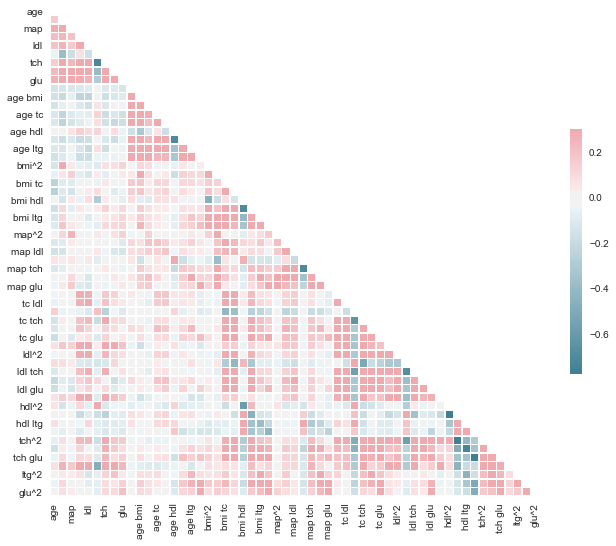

In [19]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [21]:
upper

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,age^2,age bmi,age map,age tc,age ldl,age hdl,age tch,age ltg,age glu,bmi^2,bmi map,bmi tc,bmi ldl,bmi hdl,bmi tch,bmi ltg,bmi glu,map^2,map tc,map ldl,map hdl,map tch,map ltg,map glu,tc^2,tc ldl,tc hdl,tc tch,tc ltg,tc glu,tc female,ldl^2,ldl hdl,ldl tch,ldl ltg,ldl glu,ldl female,hdl^2,hdl tch,hdl ltg,hdl glu,tch^2,tch ltg,tch glu,tch female,ltg^2,ltg glu,glu^2
age,NaN,0.167852,0.294671,0.226157,0.193177,0.054069,0.157053,0.229117,0.271211,0.148133,0.158077,0.146296,0.127589,0.112754,0.015086,0.126712,0.113585,0.156760,0.140730,0.059027,0.246144,0.255000,0.018319,0.169021,0.129445,0.100632,0.021696,0.112208,0.157724,0.054640,0.114674,0.024078,0.037836,0.042535,0.060709,0.144792,0.148157,0.124427,0.180085,0.075224,0.034860,0.093374,0.112630,0.206701,0.171860,0.077279,0.061927,0.009790,0.081348,0.048057,0.068629,0.159287,0.048744,0.071962,0.015986,0.044775,0.007112
bmi,NaN,NaN,0.384811,0.247464,0.256477,0.381363,0.426283,0.464156,0.413631,0.138727,0.203116,0.066735,0.226232,0.238277,0.018713,0.176354,0.124840,0.107365,0.429389,0.057317,0.092287,0.107387,0.142323,0.103433,0.119886,0.182191,0.124365,0.094740,0.144769,0.033272,0.081673,0.023463,0.045882,0.007385,0.016324,0.052081,0.033440,0.019842,0.006668,0.174947,0.018687,0.084240,0.008151,0.092652,0.046414,0.150700,0.149890,0.029977,0.010043,0.083815,0.078720,0.033734,0.094699,0.262777,0.044215,0.104099,0.080067
map,NaN,NaN,NaN,0.210655,0.161749,0.175649,0.239444,0.373188,0.373482,0.120253,0.062507,0.028776,0.105595,0.151785,0.062651,0.117827,0.022483,0.042351,0.042054,0.145892,0.097003,0.149096,0.037348,0.080429,0.022717,0.048137,0.255568,0.037992,0.017491,0.050432,0.015217,0.102652,0.161151,0.011595,0.019140,0.012403,0.001693,0.018522,0.103953,0.135911,0.002449,0.045373,0.029376,0.113107,0.130888,0.109100,0.050766,0.010536,0.021824,0.015046,0.028356,0.007725,0.043707,0.167494,0.034541,0.006291,0.033027
tc,NaN,NaN,NaN,NaN,0.902931,0.071988,0.548544,0.520972,0.288983,0.114122,0.230579,0.114905,0.061482,0.091243,0.145566,0.192354,0.125002,0.179070,0.059898,0.085810,0.011615,0.026257,0.051258,0.041611,0.020668,0.006215,0.029334,0.017809,0.029892,0.010875,0.002139,0.019927,0.092347,0.289382,0.274457,0.059426,0.203325,0.198016,0.035312,0.716220,0.292143,0.106332,0.212008,0.124147,0.062682,0.655748,0.104280,0.198033,0.033395,0.102881,0.233734,0.123400,0.105005,0.406218,0.067507,0.018428,0.028435
ldl,NaN,NaN,NaN,NaN,NaN,0.164936,0.665067,0.332134,0.261663,0.098720,0.237720,0.161674,0.089313,0.056642,0.095685,0.164926,0.206006,0.180219,0.069362,0.131254,0.026130,0.032495,0.084510,0.011439,0.095747,0.045619,0.013518,0.029922,0.004134,0.040550,0.041864,0.120722,0.122620,0.279345,0.315836,0.108384,0.239115,0.123161,0.066104,0.654070,0.320278,0.121522,0.284464,0.179408,0.129961,0.720558,0.068834,0.093609,0.109647,0.028671,0.234367,0.010573,0.085632,0.485099,0.131814,0.089599,0.005142
hdl,NaN,NaN,NaN,NaN,NaN,NaN,0.718960,0.397006,0.289281,0.012206,0.017253,0.061670,0.131677,0.088425,0.122658,0.012045,0.077447,0.048380,0.092868,0.033215,0.051532,0.085374,0.290643,0.035348,0.009914,0.079087,0.042917,0.011986,0.044649,0.087694,0.012616,0.022251,0.013532,0.037389,0.066999,0.205448,0.187663,0.031647,0.104160,0.031643,0.070826,0.133047,0.078651,0.104742,0.027525,0.097780,0.485506,0.173620,0.081334,0.065721,0.181035,0.094498,0.099581,0.465827,0.067692,0.071099,0.066351
tch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615445,0.418004,0.105918,0.167976,0.119822,0.179762,0.157459,0.012444,0.118075,0.170897,0.057286,0.071222,0.075482,0.044145,0.012194,0.037301,0.129805,0.037528,0.104316,0.011989,0.002182,0.042675,0.011680,0.047480,0.008876,0.045891,0.170675,0.197205,0.250374,0.309738,0.131785,0.124107,0.404906,0.244752,0.116110,0.275369,0.011382,0.095972,0.484772,0.111417,0.253159,0.106492,0.116251,0.490391,0.281391,0.242184,0.748722,0.129825,0.092555,0.104494
ltg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462754,0.099279,0.124336,0.023907,0.122150,0.205655,0.083663,0.178696,0.021799,0.05

In [22]:
to_drop

['tc ldl', 'ldl^2']

In [23]:
features_selected_train.drop(columns=to_drop, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression



In [25]:
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [26]:
test = SelectKBest(score_func=mutual_info_regression, k=30)
fit = test.fit(features_selected_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [27]:
features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()

,bmi,map,tc,hdl,tch,ltg,glu,age^2,age tc,age hdl,bmi^2,bmi ldl,bmi hdl,bmi tch,bmi ltg,bmi glu,map hdl,map tch,map ltg,tc^2,tc tch,tc glu,tc female,ldl tch,ldl female,tch^2,tch glu,tch female,ltg glu,glu^2
0,1.826023,1.462079,0.370605,-1.102722,1.502515,0.619668,1.542137,1.870196,0.506821,-1.508028,3.334360,1.330656,-2.013595,2.743627,1.131528,2.815978,-1.612267,2.196796,0.906004,0.137348,0.556840,0.571524,0.370605,1.094910,0.728718,2.257552,2.317084,1.502515,0.955613,2.378187
1,-0.424891,-0.767296,-0.331690,1.230277,-0.826539,-1.986232,-0.388269,0.280319,-0.175614,0.651371,0.180533,0.150536,-0.522734,0.351190,0.843933,0.164972,-0.943986,0.634200,1.524028,0.110018,0.274155,0.128785,-0.331690,0.292836,-0.354292,0.683168,0.320919,-0.826539,0.771192,0.150752
2,-0.625468,0.095688,1.859471,0.685910,-0.050188,0.511034,-0.826997,0.574600,1.409523,0.519936,0.391210,-1.092857,-0.429015,0.031391,-0.319635,0.517260,0.065633,-0.004802,0.048900,3.457632,-0.093323,-1.537777,1.859471,-0.087692,1.747264,0.002519,0.041505,-0.050188,-0.422623,0.683924
3,-0.224315,0.527180,0.426789,-0.869422,0.726164,0.439618,1.191154,1.315032,-0.489419,0.997008,0.050317,-0.175031,0.195024,-0.162889,-0.098613,-0.267194,-0.458342,0.382819,0.231758,0.182148,0.309918,0.508371,0.426789,0.566618,0.780290,0.527314,0.864973,0.726164,0.523653,1.418849
4,1.224293,-0.839211,-0.921618,0.219311,-0.826539,-0.319121,0.840171,0.212549,0.424894,-0.101109,1.498894,-1.151966,0.268501,-1.011927,-0.390698,1.028616,-0.184048,0.693641,0.267810,0.849380,0.761754,-0.774317,-0.000000,0.777710,-0.000000,0.683168,-0.694435,-0.000000,-0.268117,0.705888


In [28]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=30)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [29]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train, y_train)


In [30]:
features_selected_test = features_64_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

43.43487321054382
2968.661934662758
54.48542864530624


# Wrapper Methods

Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model us used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

An example if a wrapper method is the recursive feature elimination algorithm.



![alt text](Wrapper_1.webp)

In [31]:
from sklearn.feature_selection import RFE

In [32]:
rfe = RFE(lm, n_features_to_select=10)
rfe.fit(features_selected_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [33]:
def ranking(ranks, names, order=1):

    ranks = map(lambda x: round(x,2), ranks)
    return list(sorted(zip(ranks, names),reverse=True))

In [34]:
rankings = ranking(np.abs(lm.coef_), features_selected_train.columns)

In [35]:
rankings[:15]

[(29.46, 'tc tch'),
 (28.47, 'ltg'),
 (22.66, 'bmi'),
 (21.5, 'tch glu'),
 (17.65, 'ldl tch'),
 (17.29, 'map'),
 (15.25, 'hdl glu'),
 (14.73, 'tch female'),
 (13.94, 'tc'),
 (12.79, 'tc female'),
 (7.1, 'map ltg'),
 (6.64, 'tch'),
 (6.38, 'hdl'),
 (6.2, 'age^2'),
 (6.03, 'tc glu')]

In [36]:
[item[1] for item in rankings[0:15]]


['tc tch',
 'ltg',
 'bmi',
 'tch glu',
 'ldl tch',
 'map',
 'hdl glu',
 'tch female',
 'tc',
 'tc female',
 'map ltg',
 'tch',
 'hdl',
 'age^2',
 'tc glu']

In [37]:
final_columns = [item[1] for item in rankings[0:15]]


In [38]:
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train[final_columns], y_train)

In [39]:
features_selected_test = features_64_test[final_columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

43.36748722029978
2946.2799650995457
54.27964595591561


# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

![alt text](Embedded_1.webp)